# **COMM7330 Group Project**
# Trend analysis of visitors from different nationalities in Hong Kong

### *Group name: NO BUG*
### *Group member: Han Jingru, Zhang Canxin, Tan Yunxin , Deng Qinhao*

# Data Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdate

In [20]:
df6 = pd.read_csv('Tourism_Statistics_Total_2016M10-2019M10(cleaned).csv')

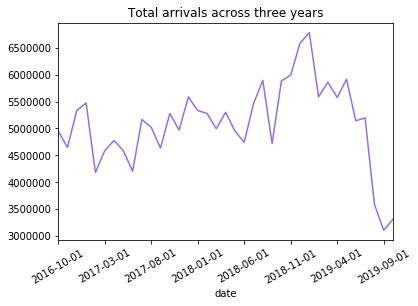

In [34]:

df6[['date','total arrivals']].plot(kind = 'line', x = 'date', y = 'total arrivals', title = 'Total arrivals across three years', color = 'mediumpurple',legend = False)
plt.xticks(rotation = 30)
plt.savefig('Total arrivals across three years.jpg',bbox_inches='tight')
plt.show()

The figure shows the change in the number of visitors to Hong Kong over the past three years, and the number of visitors to Hong Kong has been changing from 2017 to 2018, although the volatility is different, but the trend is generally the same, the difference between the peak tourist season and the off-season is more obvious. By 2019, the number of changes in the first two quarters was still in the normal range of volatility, but since April and May, the number of visitors has started to decline sharply, and the same period in 2018 has indeed increased significantly, with significant differences between the different years of the same period.

In [22]:
TourismStatistics = pd.read_csv('Tourism_Statistics_Market_2016M10-2019M10(cleaned).csv')
TourismStatistics.head()

,markets,date,total arrivals,year on year (yoy) growths (%)
0,Mainland China,2016-10-01,3723837.0,-3.5
1,Mainland China,2016-11-01,3388958.0,-3.5
2,Mainland China,2016-12-01,3948482.0,6.1
3,Mainland China,2017-01-01,4353505.0,7.7
4,Mainland China,2017-02-01,3138728.0,-6.8


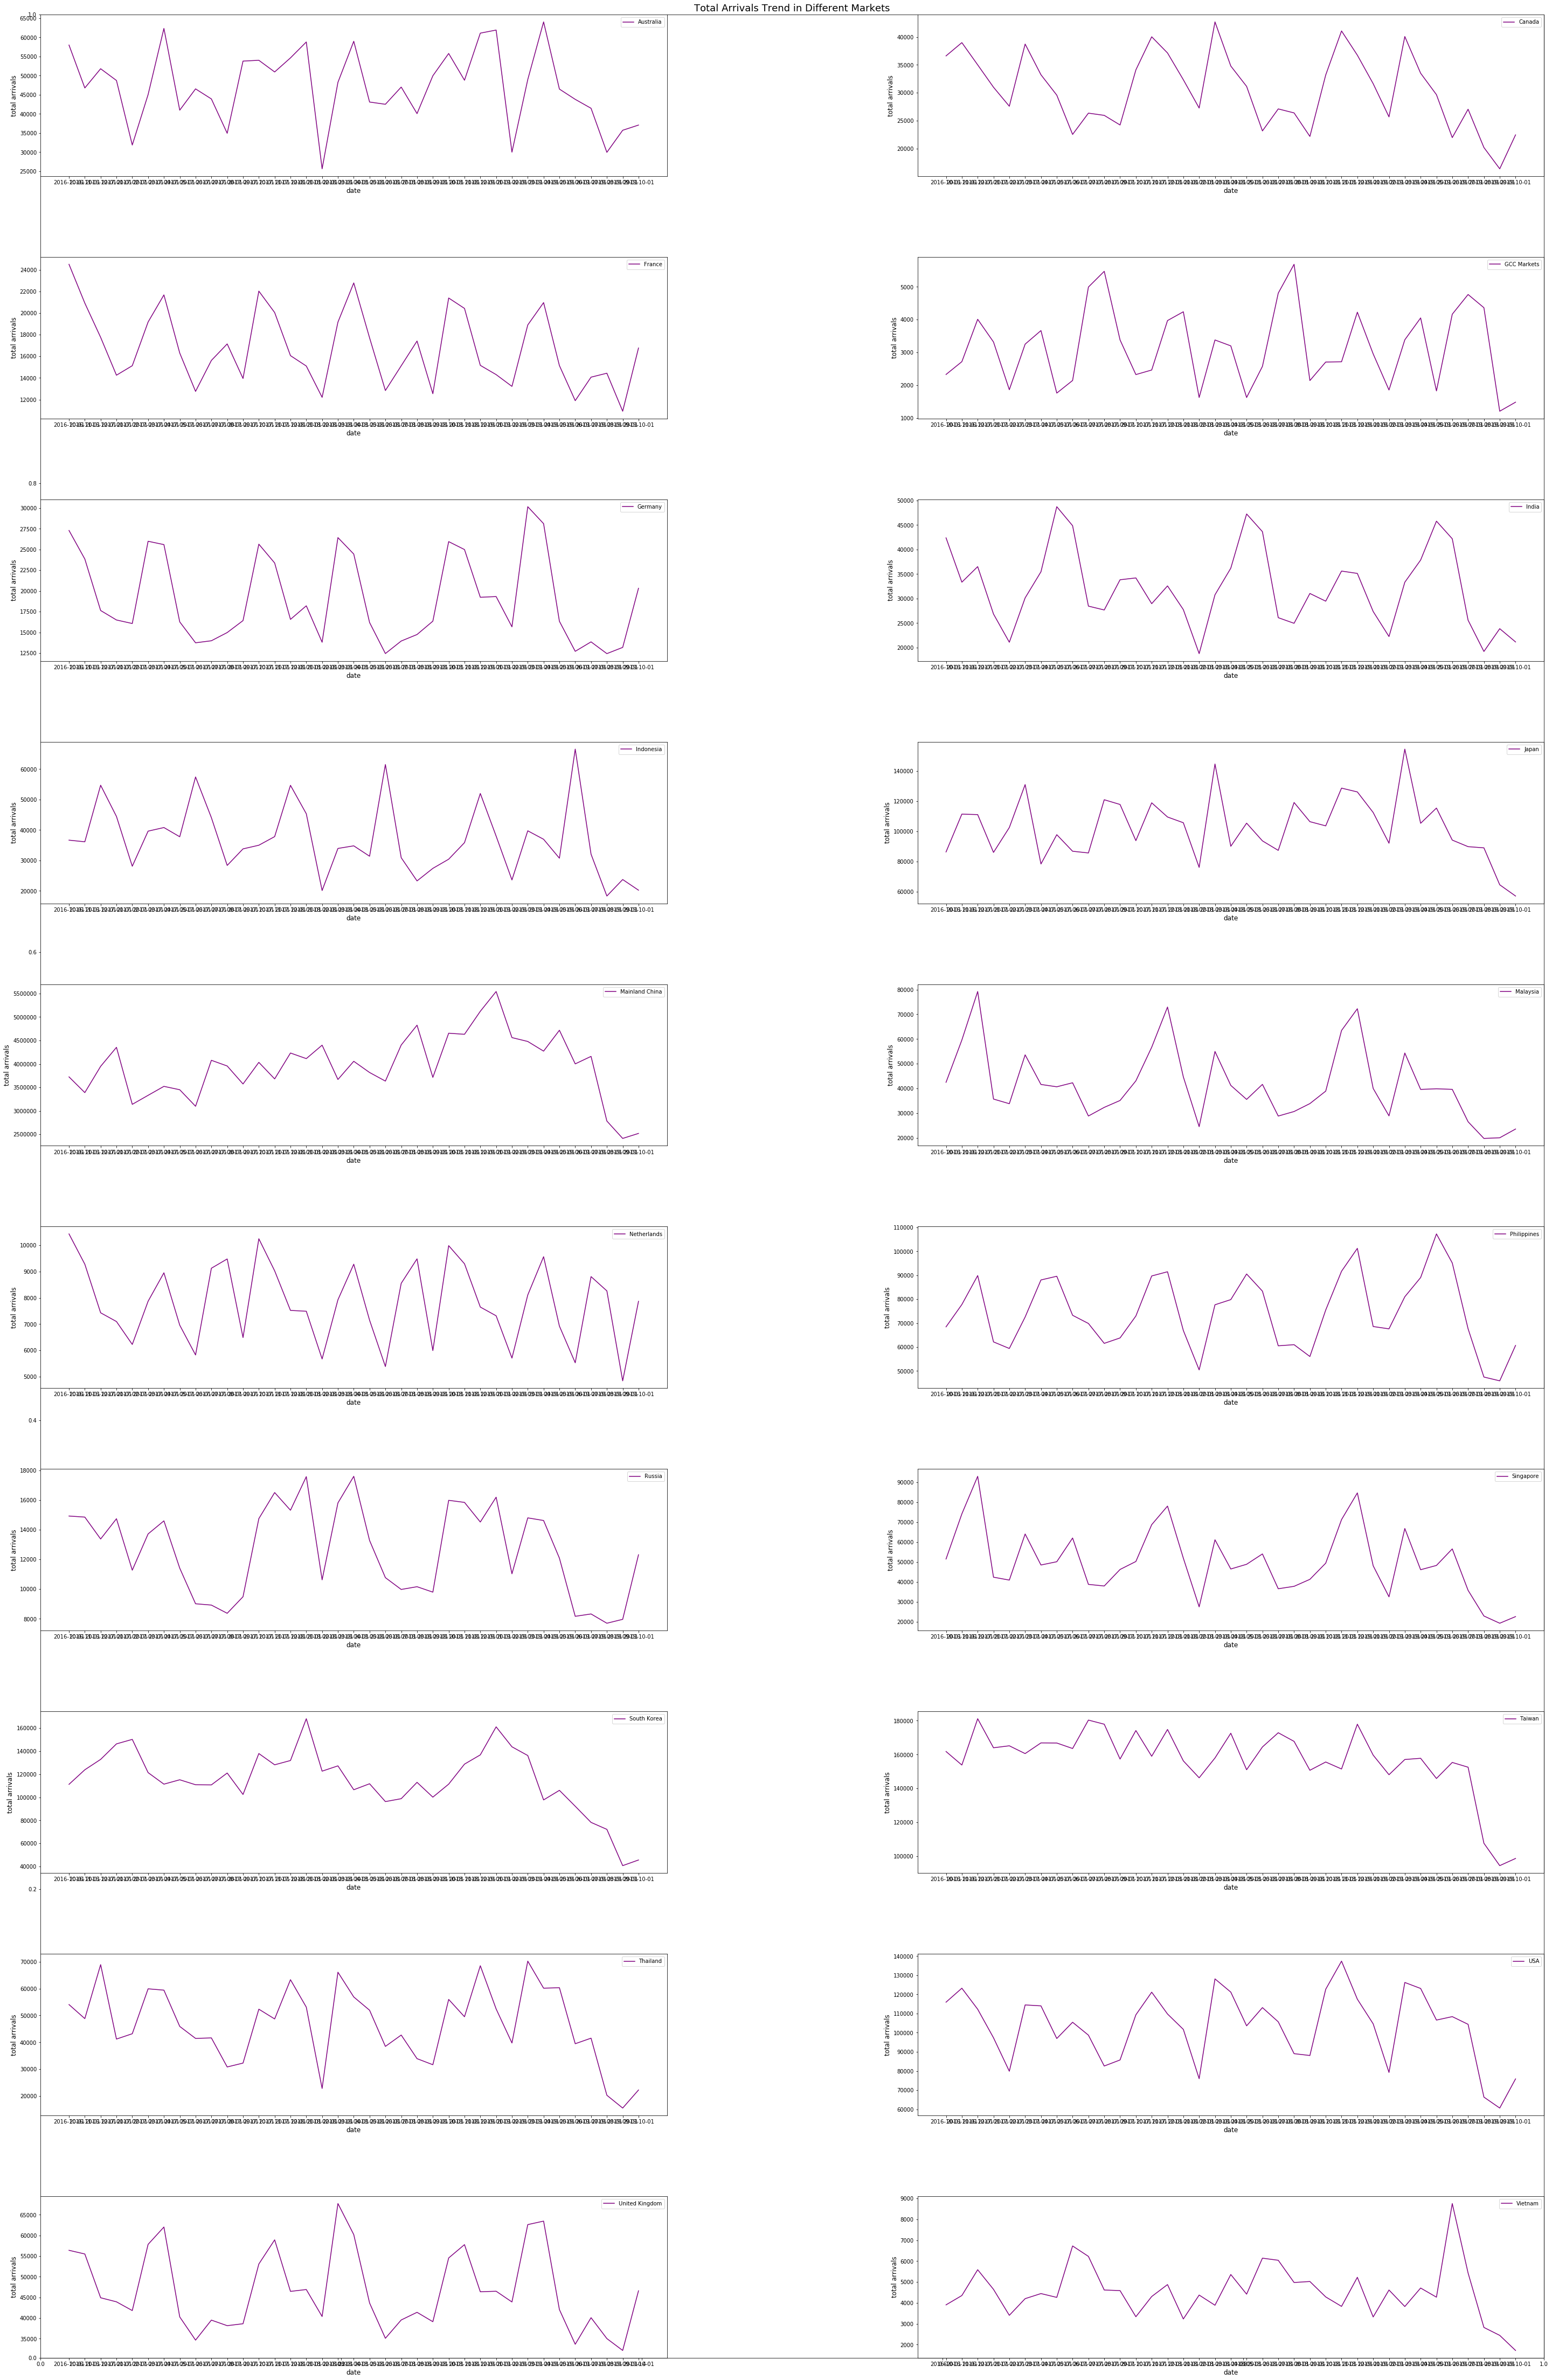

In [23]:
markets = TourismStatistics.groupby('markets').size()
fig = plt.figure(figsize=(50,80)) 
fig.subplots_adjust(hspace=0.5, wspace = 0.4) 
plt.title('Total Arrivals Trend in Different Markets',fontsize=18)
n = 1
for coun in markets.index:
    ax = fig.add_subplot(10,2,n)
    x = TourismStatistics[TourismStatistics['markets']== coun]
    TourismStatistics_pivot_g = x.pivot_table(values = 'total arrivals', columns = 'markets', index = 'date')
    ax.plot(TourismStatistics_pivot_g,color = 'purple')
    ax.set_xlabel('date',fontsize=12)
    ax.set_ylabel('total arrivals',fontsize=12)
    ax.legend([coun],loc = 'upper right') #title
    n = n+1

plt.savefig('Total Arrivals Trend in Different Markets.jpg')
plt.show()

As can be seen, the number of visitors to Hong Kong from various countries and regions in the three years shows a fluctuating trend, in line with the trend chart of visitors within three years. However, it is clear that the number of visitors from Asian countries and regions to Hong Kong in the second half of 2019 has shown a marked downward trend, while the number of visitors from Europe the United States is on the rise during the same period. 




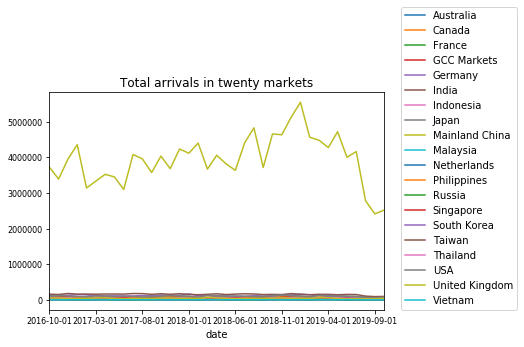

In [24]:
TourismStatistics_20markets = TourismStatistics.loc[TourismStatistics['markets'].isin(['Mainland China', 'Taiwan', 'Japan', 'South Korea', 'Indonesia','Malaysia','Philippines','Singapore','Thailand','USA','Canada','United Kingdom','France','Germany','Australia','India','GCC Markets','Russia','Netherlands','Vietnam'])]
TourismStatistics_20markets_pivot = TourismStatistics_20markets.pivot_table(values='total arrivals', columns='markets', index='date')
TourismStatistics_20markets_pivot.plot(title='Total arrivals in twenty markets',fontsize = 8)
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.savefig('Total arrivals in twenty markets.jpg')
plt.show()

In [25]:
TourismStatistics_Region = pd.read_csv('Tourism_Statistics_Region_2016M10-2019M10(cleaned).csv')

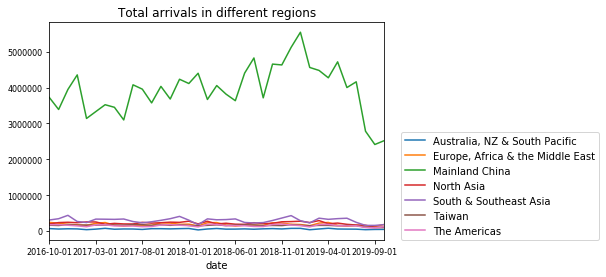

<Figure size 14400x7200 with 0 Axes>

In [26]:
TourismStatistics_7region = TourismStatistics_Region.loc[TourismStatistics_Region['market regions'].isin(['Mainland China', 'North Asia', 'South & Southeast Asia', 'Taiwan','The Americas','Europe, Africa & the Middle East','Australia, NZ & South Pacific'])]
TourismStatistics_7region_pivot = TourismStatistics_7region.pivot_table(values='total arrivals', columns='market regions', index='date')
TourismStatistics_7region_pivot.plot(title='Total arrivals in different regions',fontsize = 8)
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.figure(figsize=(200,100))
plt.savefig('Total arrivals in different regions.jpg')
plt.show()

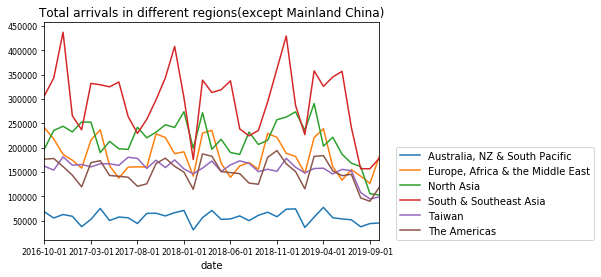

<Figure size 14400x7200 with 0 Axes>

In [27]:
TourismStatistics_6region = TourismStatistics_Region.loc[TourismStatistics_Region['market regions'].isin(['North Asia', 'South & Southeast Asia', 'Taiwan','The Americas','Europe, Africa & the Middle East','Australia, NZ & South Pacific'])]
TourismStatistics_6region_pivot = TourismStatistics_6region.pivot_table(values='total arrivals', columns='market regions', index='date')
TourismStatistics_6region_pivot.plot(title='Total arrivals in different regions(except Mainland China)',fontsize = 8)
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.figure(figsize=(200,100))
plt.savefig('Total arrivals in different regions(except Mainland China).jpg')
plt.show()

The above three images show the changing trend of visitors from different regions to Hong Kong over the past three years, with it becoming clear that the number of tourists from mainland China far exceeds that of any other country or region, and that the volatility trend of other countries or regions appears to be even flat in mainland China. But the icon on the left removes the data from mainland China to clearly show the trend changes in other countries and regions. More obviously, there was a decline in tourists from all countries and regions in the winter of 2017 and 2018, and the decline in visitor numbers was evident in the second half of 2019.

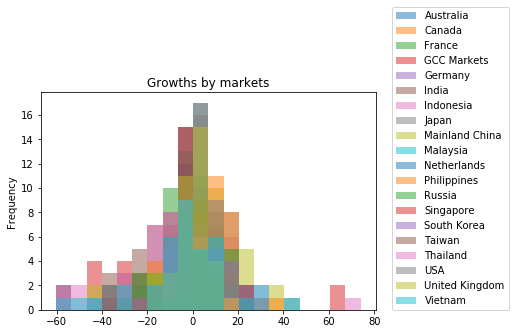

In [30]:
TourismStatistics_pivot = TourismStatistics.pivot_table(values = 'year on year (yoy) growths (%)', columns = 'markets', index = 'date')
TourismStatistics_pivot.plot(kind = 'hist', alpha=0.5, bins = 20, title = 'Growths by markets')
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.savefig('Growths by markets.jpg')
plt.show()

In [31]:
TourismStatistics.sort_values(by=['date','markets'],ascending = True,inplace= True) #sort the data by date and markets
TourismStatistics.head()

,markets,date,total arrivals,year on year (yoy) growths (%)
518,Australia,2016-10-01,58011.0,3.6
370,Canada,2016-10-01,36607.0,7.1
444,France,2016-10-01,24500.0,3.6
592,GCC Markets,2016-10-01,2330.0,-23.5
481,Germany,2016-10-01,27295.0,4.7


In [32]:
sum1 = TourismStatistics.head(260).groupby(by=['markets'])['total arrivals'].sum() # select the data from 2016.10 to 2017.10 and then sum the total arrivals in every month up
sum3 = TourismStatistics.tail(240).groupby(by=['markets'])['total arrivals'].sum() # select the data from 2017.11 to 2018.10 and then sum the total arrivals in every month up
sum2 = TourismStatistics.iloc[240:480,].groupby(by=['markets'])['total arrivals'].sum() # select the data from 2018.11 to 2019.10 and then sum the total arrivals in every month up

In [33]:
dict_sum1 = {'markets':markets.index,'total arrivals':sum1.values} # convert the series to dictionary
df_sum1 = pd.DataFrame(dict_sum1).drop(index=[8],axis=1) # convert the dict to dataframe and remove the ninth line
df_sum1.sort_values(by=['total arrivals'],ascending = False,inplace= True) # sort the data in descending order of the column'total arrivals'

dict_sum2 = {'markets':markets.index,'total arrivals':sum2.values}
df_sum2 = pd.DataFrame(dict_sum2).drop(index=[8],axis=1)
df_sum2.sort_values(by=['total arrivals'],ascending = False,inplace= True)

dict_sum3 = {'markets':markets.index,'total arrivals':sum3.values}
df_sum3 = pd.DataFrame(dict_sum3).drop(index=[8],axis=1)
df_sum3.sort_values(by=['total arrivals'],ascending = False,inplace= True)

In [35]:
df_sum1.head()

,markets,total arrivals
15,Taiwan,2173728.0
14,South Korea,1595546.0
17,USA,1336155.0
7,Japan,1310512.0
11,Philippines,949418.0


In [36]:
df_sum2.head()

,markets,total arrivals
15,Taiwan,1948202.0
14,South Korea,1442498.0
17,USA,1266938.0
7,Japan,1251625.0
11,Philippines,880593.0


In [ ]:
df_sum3.head()

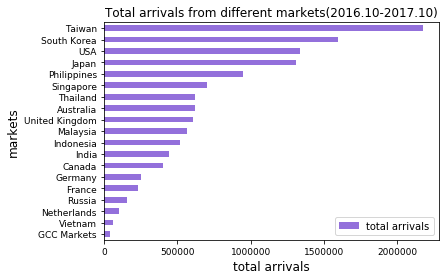

In [37]:
df_sum1.plot(kind = 'barh', rot = 0,fontsize = 9, x = 'markets', y = 'total arrivals',color = 'mediumpurple')
plt.xlabel('total arrivals',fontsize = 12)
plt.ylabel('markets',fontsize = 12)
plt.title('Total arrivals from different markets(2016.10-2017.10)')
plt.gca().invert_yaxis()
plt.savefig('Total arrivals from different markets(2016.10-2017.10).jpg')
plt.show()

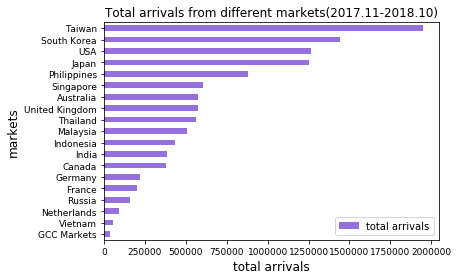

In [38]:
df_sum2.plot(kind = 'barh', rot = 0,fontsize = 9, x = 'markets', y = 'total arrivals', color = 'mediumpurple')
plt.xlabel('total arrivals',fontsize = 12)
plt.ylabel('markets',fontsize = 12)
plt.title('Total arrivals from different markets(2017.11-2018.10)')
plt.gca().invert_yaxis()
plt.savefig('Total arrivals from different markets(2017.11-2018.10).jpg')
plt.show()

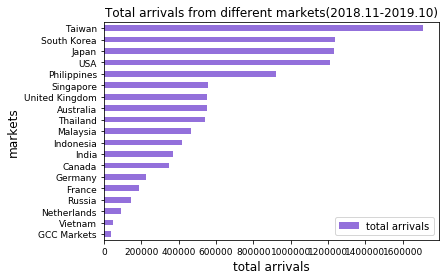

In [39]:
df_sum3.plot(kind = 'barh', rot = 0,fontsize = 9, x = 'markets', y = 'total arrivals',color = 'mediumpurple')
plt.xlabel('total arrivals',fontsize = 12)
plt.ylabel('markets',fontsize = 12)
plt.title('Total arrivals from different markets(2018.11-2019.10)')
plt.gca().invert_yaxis()
plt.savefig('Total arrivals from different markets(2018.11-2019.10).jpg')
plt.show()

According to the three bar charts, excluding the very obvious figures in the mainland, it is clear from the table that Hong Kong tourists come mainly from Taiwan, South Korea, Japan and the Philippines in Asia. As for European and Americas countries, Hong Kong tourist are mainly from the United States and Britain. Few tourists from France, Russia, Netherlans and Gulf countries come to Hong Kong .The number of visitors from these countries and regions has increased from 2016 to 2017, with a significant decrease in the number of visitors in the same period to 2019.

In [40]:
dfg = pd.read_csv('Tourism_Statistics_Market_2016M10-2019M10(cleaned).csv')
dfg.head()

,markets,date,total arrivals,year on year (yoy) growths (%)
0,Mainland China,2016-10-01,3723837.0,-3.5
1,Mainland China,2016-11-01,3388958.0,-3.5
2,Mainland China,2016-12-01,3948482.0,6.1
3,Mainland China,2017-01-01,4353505.0,7.7
4,Mainland China,2017-02-01,3138728.0,-6.8


In [41]:
a1=dfg[dfg['markets']=='Mainland China'] 
a1.head()

,markets,date,total arrivals,year on year (yoy) growths (%)
0,Mainland China,2016-10-01,3723837.0,-3.5
1,Mainland China,2016-11-01,3388958.0,-3.5
2,Mainland China,2016-12-01,3948482.0,6.1
3,Mainland China,2017-01-01,4353505.0,7.7
4,Mainland China,2017-02-01,3138728.0,-6.8


In [42]:
pip install pygal -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [43]:
import pygal

pygal.Bar()(1, 3, 3, 7)(1, 6, 6, 4).render()

b'<?xml version=\'1.0\' encoding=\'utf-8\'?>\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" id="chart-1aef40c7-5111-4224-b078-65f6c1473d66" class="pygal-chart" viewBox="0 0 800 600"><!--Generated with pygal 2.4.0 (lxml) \xc2\xa9Kozea 2012-2016 on 2019-12-08--><!--http://pygal.org--><!--http://github.com/Kozea/pygal--><defs><style type="text/css">#chart-1aef40c7-5111-4224-b078-65f6c1473d66{-webkit-user-select:none;-webkit-font-smoothing:antialiased;font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace}#chart-1aef40c7-5111-4224-b078-65f6c1473d66 .title{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:16px}#chart-1aef40c7-5111-4224-b078-65f6c1473d66 .legends .legend text{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:14px}#chart-1aef40c7-5111-4224-b078-65f6c1473d66 .axis text{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:10px}#chart-1aef40c7-5111-4224-b078-65f6c1473d6

In [44]:
pip install cairosvg

Note: you may need to restart the kernel to use updated packages.


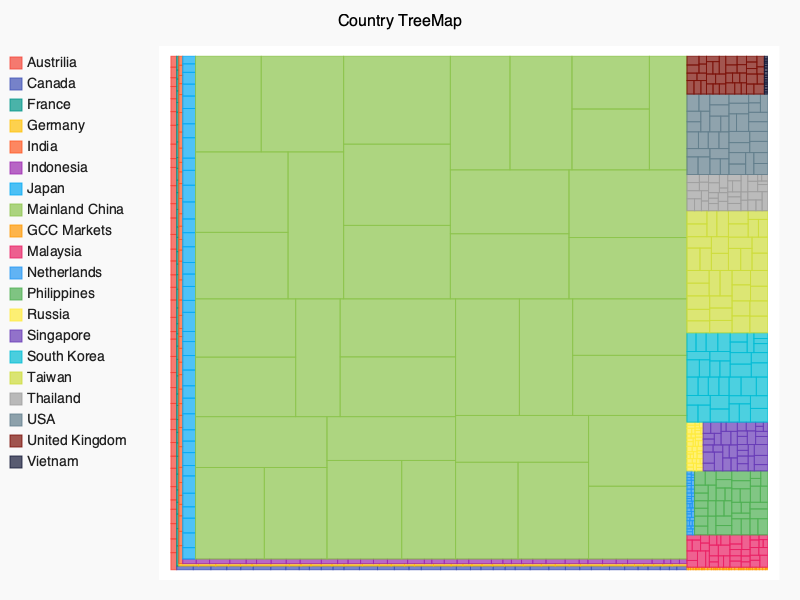

In [46]:
import pygal

treemap = pygal.Treemap()
treemap.title = 'Country TreeMap'
treemap.add('Austrilia',[58011,46790,51816,48746,31868,45054,62354,40984,46548,43920,34938,53812,54027,50975,54655,58811,25649,48259,58997,43110,42521,47022,40084,49974,55805,48813,61122,61930,30004,48986,64064,46496,43811,41476,29957,35725,37086])
treemap.add('Canada',[36607,38989,35001,30983,27575,38730,33223,29565,22517,26336,25936,24209,34094,40034,37133,32330,27250,42708,34789,31135,23147,27094,26377,22159,33183,41083,36737,31623,25666,40083,33497,29650,21948,27034,20169,16347,22438])
treemap.add('France',[24500,20915,17750,14254,15131,19168,21673,16302,12759,15618,17144,13953,22023,20043,16062,15102,12210,19157,22779,17708,12840,15124,17410,12545,21386,20425,15164,14310,13221,18896,20961,15144,11902,14073,14437,10927,16768])
treemap.add('Germany',[27295,23853,17644,16503,16076,25992,25589,16273,13751,13997,14986,16428,25641,23373,16574,18212,13818,26432,24450,16197,12455,13965,14749,16359,25950,24993,19239,19326,15678,30158,28115,16346,12723,13864,12447,13196,20326])
treemap.add('India', [42380,33343,36510,26850,21099,30140,35461,48727,44856,28461,27675,33835,34208,28960,32581,27749,18778,30766,36195,47248,43640,26106,24958,31040,29468,35606,35127,27364,22261,33330,37853,45783,42189,25588,19215,23860,21160])
treemap.add('Indonesia', [36672,36137,54726,44462,28102,39634,40818,37790,57437,44069,28367,33806,35006,37837,54694,45348,20125,33951,34805,31392,61527,30907,23278,27402,30412,35850,52010,38005,23600,39747,36963,30744,66592,32061,18314,23733,20232])
treemap.add('Japan', [86409,111487,111163,86100,102590,131082,78433,97850,86867,85733,121018,117878,93902,118985,109572,105771,76165,144709,90170,105494,93742,87439,119194,106482,103692,128720,126195,112565,92186,154586,105400,115504,94264,89908,89120,64624,57179])
treemap.add('Mainland China', [3723837,3388958,3948482,4353505,3138728,3330769,3521932,3450028,3097716,4077183,3955989,3572769,4033473,3680755,4232412,4113241,4399696,3668375,4056097,3817370,3634089,4402955,4825547,3713464,4654391,4631378,5121627,5542896,4560963,4478389,4272755,4717520,4000994,4160688,2782897,2412459,2519243])
treemap.add('GCC Markets', [2330,2720,4011,3320,1866,3254,3667,1763,2147,4993,5472,3382,2327,2466,3972,4240,1629,3381,3201,1629,2577,4808,5686,2145,2709,2717,4227,2957,1857,3386,4052,1829,4166,4766,4364,1211,1486])
treemap.add('Malaysia', [42482,59592,79237,35704,33821,53602,41609,40670,42293,28836,32332,35125,43074,56682,72953,44684,24527,54963,41235,35565,41644,28820,30658,33867,38910,63461,72267,40002,28894,54338,39608,39857,39631,26513,19763,20027,23563])
treemap.add('Netherlands', [10436,9282,7430,7097,6224,7870,8954,6959,5823,9128,9482,6487,10252,9029,7521,7489,5671,7926,9282,7148,5382,8553,9486,5990,9989,9298,7649,7316,5704,8109,9568,6924,5525,8809,8265,4837,7868])
treemap.add('Philippines', [68458,77779,89875,62172,59418,72563,88044,89590,73282,69864,61560,63826,72987,89711,91472,66932,50471,77677,79832,90537,83369,60535,61003,56067,75478,91678,101242,68588,67623,81028,89051,107275,95140,67636,47488,45903,60694])
treemap.add('Russia', [14921,14849,13374,14739,11276,13716,14596,11412,9014,8926,8373,9488,14746,16502,15310,17572,10625,15804,17594,13276,10773,9978,10162,9797,15979,15839,14517,16190,11032,14797,14620,12086,8169,8328,7703,7966,12314])
treemap.add('Singapore', [51467,74126,92996,42334,40872,64033,48450,50102,62007,38722,37907,46210,50215,68713,78047,51891,27431,61115,46448,48814,54009,36518,37740,41249,49375,71251,84667,48078,32467,66792,46085,48231,56543,35726,22842,19200,22533])
treemap.add('South Korea', [111226,123855,132878,146326,150226,121401,111391,115183,110875,110754,121041,102433,137957,128185,131898,168152,122667,127261,106526,111738,96260,98776,112959,100119,111400,128753,136800,161115,143804,136225,97710,106017,92229,78210,72166,40684,45591])
treemap.add('Taiwan', [161813,153844,181149,164020,165183,160589,166892,166827,163588,180352,177920,157363,174188,159009,174824,156300,146308,157997,172597,151060,164497,172884,167791,150747,155625,151502,177926,159680,148116,157101,157816,145912,155363,152560,107702,94497,98734])
treemap.add('Thailand', [54047,48824,68898,41215,43203,59902,59407,45922,41455,41649,30844,32285,52331,48699,63295,53084,22854,66074,56878,51939,38488,42710,33931,31678,55964,49520,68486,52420,39762,70197,60142,60311,39486,41548,20325,15564,22272])
treemap.add('USA', [115961,123254,112273,97355,79875,114515,114030,96974,105460,98731,82604,85766,109357,121179,109783,101744,75975,128125,121213,103594,113117,105698,89055,88098,122699,137397,117517,104644,79248,126252,123121,106604,108405,104385,66364,60642,75867])
treemap.add('United Kingdom', [56407,55517,44918,43933,41817,57845,62043,40280,34656,39504,38159,38626,53089,58939,46462,46909,40376,67731,60214,43653,35102,39538,41393,39121,54553,57782,46367,46498,43897,62630,63476,42058,33657,40090,35032,32157,46605])
treemap.add('Vietnam', [3907,4353,5589,4649,3405,4204,4447,4264,6727,6227,4618,4589,3338,4306,4878])
treemap.render_to_file('treemap-demo.svg')
treemap

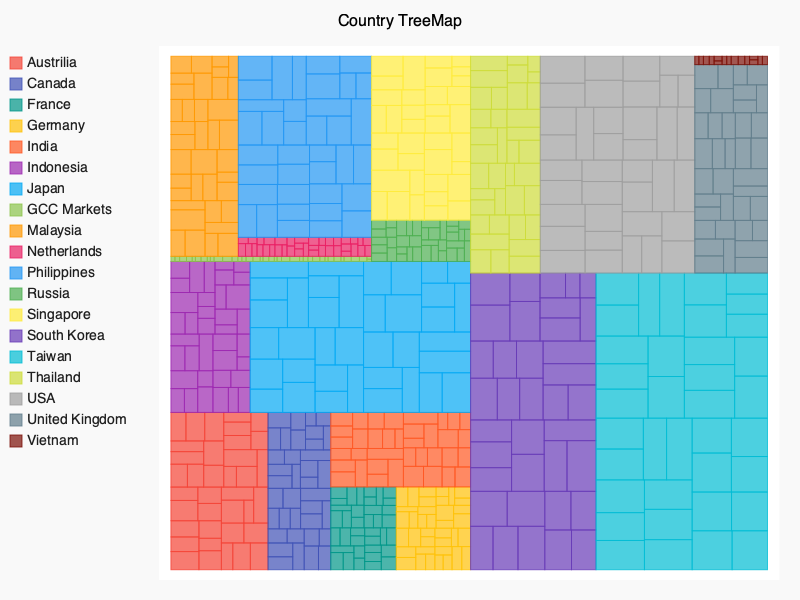

In [47]:
import pygal

treemap = pygal.Treemap()
treemap.title = 'Country TreeMap'
treemap.add('Austrilia',[58011,46790,51816,48746,31868,45054,62354,40984,46548,43920,34938,53812,54027,50975,54655,58811,25649,48259,58997,43110,42521,47022,40084,49974,55805,48813,61122,61930,30004,48986,64064,46496,43811,41476,29957,35725,37086])
treemap.add('Canada',[36607,38989,35001,30983,27575,38730,33223,29565,22517,26336,25936,24209,34094,40034,37133,32330,27250,42708,34789,31135,23147,27094,26377,22159,33183,41083,36737,31623,25666,40083,33497,29650,21948,27034,20169,16347,22438])
treemap.add('France',[24500,20915,17750,14254,15131,19168,21673,16302,12759,15618,17144,13953,22023,20043,16062,15102,12210,19157,22779,17708,12840,15124,17410,12545,21386,20425,15164,14310,13221,18896,20961,15144,11902,14073,14437,10927,16768])
treemap.add('Germany',[27295,23853,17644,16503,16076,25992,25589,16273,13751,13997,14986,16428,25641,23373,16574,18212,13818,26432,24450,16197,12455,13965,14749,16359,25950,24993,19239,19326,15678,30158,28115,16346,12723,13864,12447,13196,20326])
treemap.add('India', [42380,33343,36510,26850,21099,30140,35461,48727,44856,28461,27675,33835,34208,28960,32581,27749,18778,30766,36195,47248,43640,26106,24958,31040,29468,35606,35127,27364,22261,33330,37853,45783,42189,25588,19215,23860,21160])
treemap.add('Indonesia', [36672,36137,54726,44462,28102,39634,40818,37790,57437,44069,28367,33806,35006,37837,54694,45348,20125,33951,34805,31392,61527,30907,23278,27402,30412,35850,52010,38005,23600,39747,36963,30744,66592,32061,18314,23733,20232])
treemap.add('Japan', [86409,111487,111163,86100,102590,131082,78433,97850,86867,85733,121018,117878,93902,118985,109572,105771,76165,144709,90170,105494,93742,87439,119194,106482,103692,128720,126195,112565,92186,154586,105400,115504,94264,89908,89120,64624,57179])
#treemap.add('Mainland China', [3723837,3388958,3948482,4353505,3138728,3330769,3521932,3450028,3097716,4077183,3955989,3572769,4033473,3680755,4232412,4113241,4399696,3668375,4056097,3817370,3634089,4402955,4825547,3713464,4654391,4631378,5121627,5542896,4560963,4478389,4272755,4717520,4000994,4160688,2782897,2412459,2519243])
treemap.add('GCC Markets', [2330,2720,4011,3320,1866,3254,3667,1763,2147,4993,5472,3382,2327,2466,3972,4240,1629,3381,3201,1629,2577,4808,5686,2145,2709,2717,4227,2957,1857,3386,4052,1829,4166,4766,4364,1211,1486])
treemap.add('Malaysia', [42482,59592,79237,35704,33821,53602,41609,40670,42293,28836,32332,35125,43074,56682,72953,44684,24527,54963,41235,35565,41644,28820,30658,33867,38910,63461,72267,40002,28894,54338,39608,39857,39631,26513,19763,20027,23563])
treemap.add('Netherlands', [10436,9282,7430,7097,6224,7870,8954,6959,5823,9128,9482,6487,10252,9029,7521,7489,5671,7926,9282,7148,5382,8553,9486,5990,9989,9298,7649,7316,5704,8109,9568,6924,5525,8809,8265,4837,7868])
treemap.add('Philippines', [68458,77779,89875,62172,59418,72563,88044,89590,73282,69864,61560,63826,72987,89711,91472,66932,50471,77677,79832,90537,83369,60535,61003,56067,75478,91678,101242,68588,67623,81028,89051,107275,95140,67636,47488,45903,60694])
treemap.add('Russia', [14921,14849,13374,14739,11276,13716,14596,11412,9014,8926,8373,9488,14746,16502,15310,17572,10625,15804,17594,13276,10773,9978,10162,9797,15979,15839,14517,16190,11032,14797,14620,12086,8169,8328,7703,7966,12314])
treemap.add('Singapore', [51467,74126,92996,42334,40872,64033,48450,50102,62007,38722,37907,46210,50215,68713,78047,51891,27431,61115,46448,48814,54009,36518,37740,41249,49375,71251,84667,48078,32467,66792,46085,48231,56543,35726,22842,19200,22533])
treemap.add('South Korea', [111226,123855,132878,146326,150226,121401,111391,115183,110875,110754,121041,102433,137957,128185,131898,168152,122667,127261,106526,111738,96260,98776,112959,100119,111400,128753,136800,161115,143804,136225,97710,106017,92229,78210,72166,40684,45591])
treemap.add('Taiwan', [161813,153844,181149,164020,165183,160589,166892,166827,163588,180352,177920,157363,174188,159009,174824,156300,146308,157997,172597,151060,164497,172884,167791,150747,155625,151502,177926,159680,148116,157101,157816,145912,155363,152560,107702,94497,98734])
treemap.add('Thailand', [54047,48824,68898,41215,43203,59902,59407,45922,41455,41649,30844,32285,52331,48699,63295,53084,22854,66074,56878,51939,38488,42710,33931,31678,55964,49520,68486,52420,39762,70197,60142,60311,39486,41548,20325,15564,22272])
treemap.add('USA', [115961,123254,112273,97355,79875,114515,114030,96974,105460,98731,82604,85766,109357,121179,109783,101744,75975,128125,121213,103594,113117,105698,89055,88098,122699,137397,117517,104644,79248,126252,123121,106604,108405,104385,66364,60642,75867])
treemap.add('United Kingdom', [56407,55517,44918,43933,41817,57845,62043,40280,34656,39504,38159,38626,53089,58939,46462,46909,40376,67731,60214,43653,35102,39538,41393,39121,54553,57782,46367,46498,43897,62630,63476,42058,33657,40090,35032,32157,46605])
treemap.add('Vietnam', [3907,4353,5589,4649,3405,4204,4447,4264,6727,6227,4618,4589,3338,4306,4878])
treemap

From the two tree maps, it is very obvious that mainland China is the main source of tourism in Hong Kong, in the second chart to remove the value of mainland China, you can find that Hong Kong's main source of tourists from Taiwan, Japan, the United States, South Korea and other places.



# 3. Analysis discussion

**From October 2016 to October 2019, the number of tourists visiting Hong Kong fluctuated. The total number of tourists remained between 4 million and 6.5 million before the winter of 2018. Winter 2018 is the peak period of the number of tourists visiting Hong Kong. The total number exceeds 6.5 million.**

**Visitors from mainland China are the main source of tourists from Hong Kong, which greatly exceeds any country and region. Tourists from Southeast Asian countries are also the main source of tourists from Hong Kong. There are fewer tourists from Europe and the Americas.**

**Since April 2019, affected by demonstrations in Hong Kong, the number of tourists has plummeted, and the number of tourists maintained around 300,000, which is lower than at any time in three years.**

**The number of tourists from Asian countries and regions has continued to decline since April 2019, but the number of tourists from European American countries or regions has increased slightly.**

**Compared to the number of tourists in 2017, the total number of tourists visiting Hong Kong in 2018 has increased, but in the same period in 2019, the number of people affected by demonstrations has declined.**

**In terms of tourist growth rates, the United States, Japan, and Singapore have higher rates of visits to Hong Kong, while the Netherlands and Germany in Europe have negative growth rates.**